**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.fit_X = np.array(X)
        self.fit_y = np.array(y)
        self.fit_XX = (self.fit_X ** 2).sum(axis=1)
        self.tree = KDTree(self.fit_X)
        self.classes = np.unique(self.fit_y)

    def dist(self, X):
        X = np.array(X)
        XX = (X ** 2).sum(axis=1)
        d = np.matmul(X, self.fit_X.T)
        d *= -2
        d += XX.reshape(XX.shape[0], 1)
        d += self.fit_XX
        d = np.sqrt(d)
        return d

    def count_nn_classes(self, X):
        X = np.array(X)
        if self.algorithm == 'kd_tree':
            d, order = self.tree.query(X, k=self.n_neighbors)
        else:
            d = self.dist(X)
            order = np.argpartition(d, self.n_neighbors)[:, :self.n_neighbors]
        nn_classes = self.fit_y[order].astype(int)
        counts = np.empty((X.shape[0], self.classes.shape[0]), dtype=int)
        for i in range(X.shape[0]):
            counts[i] = np.bincount(nn_classes[i],
                                    minlength=self.classes.astype(int).max()+1)
            [self.classes.astype(int)]
        return counts

    def predict(self, X):
        return self.classes[self.count_nn_classes(X).argmax(axis=1)].flatten()\
            .astype(self.fit_y.dtype)

    def predict_proba(self, X):
        return self.count_nn_classes(X) / self.n_neighbors

    def score(self, X, y):
        X = np.array(X)
        y = np.array(y)
        return (self.predict(X) == y).sum() / y.size

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 0 ns, sys: 2.13 ms, total: 2.13 ms
Wall time: 1.7 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 871 µs, sys: 93 µs, total: 964 µs
Wall time: 725 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 1.67 ms, sys: 181 µs, total: 1.85 ms
Wall time: 1.72 ms


array([0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 2.54 ms, sys: 212 µs, total: 2.75 ms
Wall time: 20.7 ms


array([0, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 1.16 ms, sys: 131 µs, total: 1.29 ms
Wall time: 1.2 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 790 µs, sys: 91 µs, total: 881 µs
Wall time: 544 µs


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

Max score 1.0 was reached on 1 neighbors


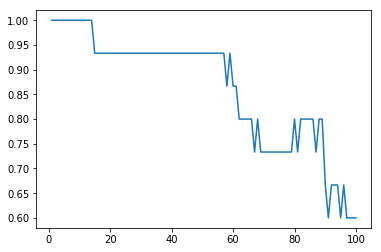

In [14]:
n = 100
scores = np.empty(n) 
for i in range(1, n + 1):
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    my_clf.fit(X_train, y_train)
    scores[i - 1] = my_clf.score(X_test, y_test)
    
plt.plot(range(1, n + 1), scores)
print('Max score {0} was reached on {1} neighbors'.format(scores.max(), scores.argmax() + 1))

**MNIST**

In [15]:
mnist = fetch_openml('mnist_784')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 30.8 s, sys: 43.7 ms, total: 30.8 s
Wall time: 30.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 31.1 s, sys: 536 ms, total: 31.6 s
Wall time: 30.4 s


In [20]:
%time clf.predict(X_test)

CPU times: user 1min 6s, sys: 0 ns, total: 1min 6s
Wall time: 1min 6s


array(['3', '0', '8', '1', '8', '5', '6', '4', '3', '3', '6', '6', '9',
       '4', '6', '9', '7', '7', '7', '1', '3', '5', '3', '9', '9', '2',
       '7', '0', '4', '6', '8', '4', '7', '4', '3', '5', '5', '2', '3',
       '4', '0', '2', '5', '0', '4', '3', '7', '1', '3', '5', '9', '0',
       '6', '6', '6', '2', '0', '5', '0', '8', '7', '4', '7', '1', '5',
       '2', '1', '9', '4', '7', '3', '4', '9', '1', '1', '8', '5', '6',
       '7', '7', '7', '7', '3', '8', '4', '3', '4', '9', '8', '0', '2',
       '0', '3', '4', '7', '5', '5', '0', '0', '2', '5', '7', '5', '9',
       '1', '9', '4', '9', '4', '8', '6', '5', '6', '1', '4', '4', '6',
       '9', '3', '6', '0', '1', '0', '6', '2', '4', '6', '2', '1', '0',
       '1', '4', '1', '1', '5', '2', '6', '7', '5', '4', '2', '1', '6',
       '4', '2', '6', '7', '9', '8', '5', '1', '1', '6', '0', '9', '0',
       '0', '9', '7', '4', '1', '7', '2', '0', '9', '0', '0', '6', '3',
       '5', '1', '8', '3', '9', '2', '4', '8', '8', '0', '3', '9

In [21]:
%time my_clf.predict(X_test)

CPU times: user 4.46 s, sys: 348 ms, total: 4.81 s
Wall time: 1.31 s


array(['3', '0', '8', '1', '8', '5', '6', '4', '3', '3', '6', '6', '9',
       '4', '6', '9', '7', '7', '7', '1', '3', '5', '3', '9', '9', '2',
       '7', '0', '4', '6', '8', '4', '7', '4', '3', '5', '5', '2', '3',
       '4', '0', '2', '5', '0', '4', '3', '7', '1', '3', '5', '9', '0',
       '6', '6', '6', '2', '0', '5', '0', '8', '7', '4', '7', '1', '5',
       '2', '1', '9', '4', '7', '3', '4', '9', '1', '1', '8', '5', '6',
       '7', '7', '7', '7', '3', '8', '4', '3', '4', '9', '8', '0', '2',
       '0', '3', '4', '7', '5', '5', '0', '0', '2', '5', '7', '5', '9',
       '1', '9', '4', '9', '4', '8', '6', '5', '6', '1', '4', '4', '6',
       '9', '3', '6', '0', '1', '0', '6', '2', '4', '6', '2', '1', '0',
       '1', '4', '1', '1', '5', '2', '6', '7', '5', '4', '2', '1', '6',
       '4', '2', '6', '7', '9', '8', '5', '1', '1', '6', '0', '9', '0',
       '0', '9', '7', '4', '1', '7', '2', '0', '9', '0', '0', '6', '3',
       '5', '1', '8', '3', '9', '2', '4', '8', '8', '0', '3', '9

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 1min 6s, sys: 0 ns, total: 1min 6s
Wall time: 1min 6s


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 4.49 s, sys: 360 ms, total: 4.85 s
Wall time: 1.32 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [24]:
clf.score(X_test, y_test)

0.9728571428571429

In [25]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 28.5 s, sys: 28.1 ms, total: 28.5 s
Wall time: 28.5 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 31.1 s, sys: 536 ms, total: 31.7 s
Wall time: 30.5 s


In [30]:
%time clf.predict(X_test)

CPU times: user 1min 6s, sys: 15.7 ms, total: 1min 6s
Wall time: 1min 6s


array(['9', '5', '7', '1', '2', '0', '0', '8', '3', '4', '1', '8', '8',
       '7', '2', '2', '5', '4', '6', '5', '5', '2', '5', '8', '7', '6',
       '4', '3', '9', '3', '8', '6', '3', '6', '3', '0', '9', '2', '7',
       '0', '0', '6', '5', '1', '6', '0', '6', '8', '1', '7', '1', '1',
       '7', '4', '7', '4', '0', '5', '8', '2', '3', '5', '9', '6', '3',
       '3', '4', '4', '4', '3', '6', '8', '7', '6', '6', '3', '6', '2',
       '6', '7', '0', '2', '0', '6', '0', '6', '7', '0', '6', '3', '8',
       '0', '7', '3', '3', '0', '7', '4', '3', '6', '6', '1', '7', '9',
       '4', '3', '6', '3', '2', '1', '7', '4', '8', '1', '5', '1', '4',
       '9', '1', '1', '9', '8', '0', '9', '1', '0', '9', '2', '8', '9',
       '4', '7', '7', '3', '0', '1', '4', '4', '6', '4', '6', '2', '9',
       '5', '0', '2', '0', '4', '1', '7', '1', '6', '9', '6', '4', '7',
       '4', '2', '4', '6', '0', '9', '1', '1', '4', '0', '2', '7', '6',
       '4', '3', '4', '9', '8', '0', '8', '3', '6', '6', '4', '1

In [31]:
%time my_clf.predict(X_test)

CPU times: user 56.5 s, sys: 97 µs, total: 56.5 s
Wall time: 55.9 s


array(['9', '5', '7', '1', '2', '0', '0', '8', '3', '4', '1', '8', '8',
       '7', '2', '2', '5', '4', '6', '5', '5', '2', '5', '8', '7', '6',
       '4', '3', '9', '3', '8', '6', '3', '6', '3', '0', '9', '2', '7',
       '0', '0', '6', '5', '1', '6', '0', '6', '8', '1', '7', '1', '1',
       '7', '4', '7', '4', '0', '5', '8', '2', '3', '5', '9', '6', '3',
       '3', '4', '4', '4', '3', '6', '8', '7', '6', '6', '3', '6', '2',
       '6', '7', '0', '2', '0', '6', '0', '6', '7', '0', '6', '3', '8',
       '0', '7', '3', '3', '0', '7', '4', '3', '6', '6', '1', '7', '9',
       '4', '3', '6', '3', '2', '1', '7', '4', '8', '1', '5', '1', '4',
       '9', '1', '1', '9', '8', '0', '9', '1', '0', '9', '2', '8', '9',
       '4', '7', '7', '3', '0', '1', '4', '4', '6', '4', '6', '2', '9',
       '5', '0', '2', '0', '4', '1', '7', '1', '6', '9', '6', '4', '7',
       '4', '2', '4', '6', '0', '9', '1', '1', '4', '0', '2', '7', '6',
       '4', '3', '4', '9', '8', '0', '8', '3', '6', '6', '4', '1

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 6s, sys: 0 ns, total: 1min 6s
Wall time: 1min 6s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 56.4 s, sys: 3.94 ms, total: 56.4 s
Wall time: 55.8 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9728571428571429

In [35]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 5

In [ ]:
# seaborn
Библиотека для построения графиков
# matplotlib
Библиотека для построения графиков
# train_test_split
Функция для разделения датасета на тренировочную и тестовую выборку в заданной пропорции
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline)
Этот класс позволяет инкапсулировать внутри себя набор трансформаторов датасета и модель предсказания,
и получить для них общий интерфейс 
# StandardScaler (from sklearn.preprocessing import StandardScaler)
Преобразование вида z = (x - u) / s, где u - это среднее значение, а s - стандартное отклонение
# ClassifierMixin
Базовый класс для классификаторов, реализующий метод score, возвращающий среднюю точность предсказания
# NeighborsBase
Базовый класс для моделей, основанных на алгоритме k ближайших соседей,
реализующий методы _fit и _check_algorithm_metric
# KNeighborsMixin
Базовый класс для моделей, основанных на алгоритме k ближайших соседей, реализующий методы для нахождения
индексов соседей, расстояний до них и для построения графа по ним
# SupervisedIntegerMixin
Реализует метод fit на основе метода _fit, производя обработку меток